In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf



In [2]:
import sys
sys.path.insert(1, '../Pre Processing Stage/')
sys.path.insert(1, '../Processing Stage/HoG')


from commonfunctions import *
from main import *
from hog import *

In [3]:
final_lbp_flattened=np.load('./numpyArrays/final_lbp_flattened.npy')
targets_lbp=np.load('./numpyArrays/targets_lbp.npy')



In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from tensorflow import keras

In [5]:
classifiers1 = {
    'SVM': SVC(random_state=40,kernel='poly'),
   
    
}

In [6]:
classifiers2 = {
    'KNN': KNeighborsClassifier(n_neighbors=7),
    
    
}

In [7]:
classifiers3 = {
    
    'rnd': RandomForestClassifier(random_state=40),
   
    
}

In [8]:
classifiers4 = {
    
    'voting_clf_soft' : VotingClassifier(
    estimators=[
        ('KNN', KNeighborsClassifier(n_neighbors=7)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42,probability=True))
    ],
    voting='soft'), 
   
    
}

In [9]:
classifiers5 = {
  
    'voting_clf_hard': VotingClassifier(
    estimators=[
            ('KNN', KNeighborsClassifier(n_neighbors=7)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(random_state=42))
        ],
    voting='hard'),
    
}

In [10]:
from sklearn.metrics import confusion_matrix
import copy
from sklearn.metrics import precision_score, recall_score, f1_score



def train_model(x,y,testSize,classifiers):
    models=[]
    mats = []
    precisions = []
    recalls = []
    f1s = []

    X_train, X_test, y_train, y_test=train_test_split(x, y,test_size=testSize,stratify=y)

    for model_name, model in copy.deepcopy(classifiers).items():
        
        print('############## Training', model_name, "##############")
        model.fit(X_train, y_train)

        accuracy = model.score(X_test, y_test)

        models.append({model_name:model})

        print(model_name, 'accuracy:', accuracy*100, '%')
        y_pred = model.predict(X_test)

        mat = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred,average='micro')
        recall = recall_score(y_test, y_pred,average='micro')
        f1 = f1_score(y_test, y_pred,average='micro')

        mats.append(mat)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

        print(mat)
            
    return models, mats, precisions, recalls, f1s

In [11]:
modelnames = ['SVM', 'KNN', 'rnd', 'voting_clf_soft', 'voting_clf_hard' ]

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def getFigures(conMat,modelname,p,r,f1):
    plt.figure()

    sns.heatmap(conMat, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix ({modelname} - LBP)")
    # plt.show()

    plt.savefig(f"./figures/Confusion Matrix ({modelname} - LBP)")
    plt.figure()

    plt.bar(["Precision", "Recall", "F1 Score"],
            [p, r, f1])
    plt.ylabel("Score")
    plt.title(f"Model Performance Metrics ({modelname} - LBP)")
    # plt.show()
    plt.savefig(
        f"./figures/Model Performance Metrics ({modelname} - LBP)")

In [15]:
models_lbp, confusion_matrices,precisions,recalls,f1s = train_model(final_lbp_flattened, targets_lbp, 0.2,classifiers1)

############## Training SVM ##############
SVM accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]


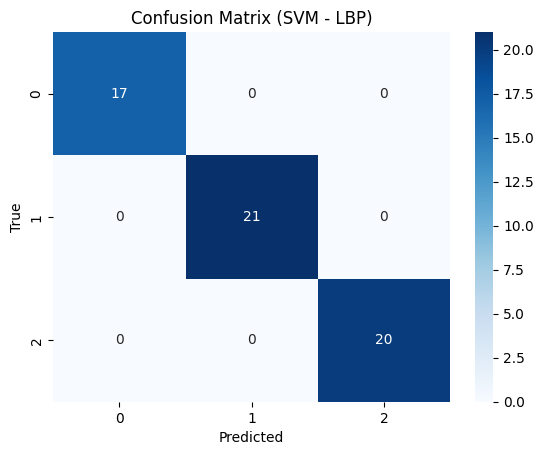

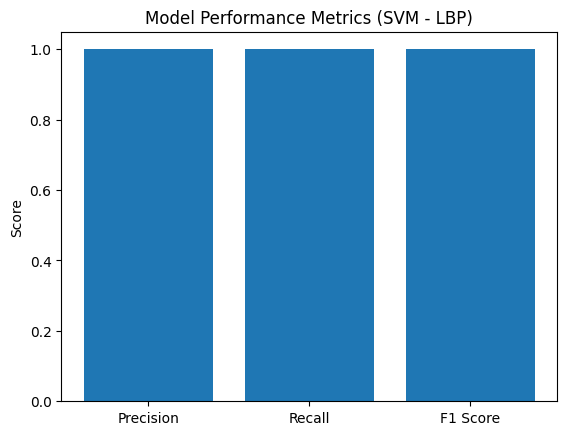

In [18]:
getFigures(confusion_matrices[0],"SVM",precisions[0],recalls[0],f1s[0])

In [19]:
models_lbp2 ,confusion_matrices,precisions,recalls,f1s = train_model(final_lbp_flattened, targets_lbp, 0.2,classifiers2)

############## Training KNN ##############
KNN accuracy: 98.27586206896551 %
[[17  0  0]
 [ 0 21  0]
 [ 0  1 19]]


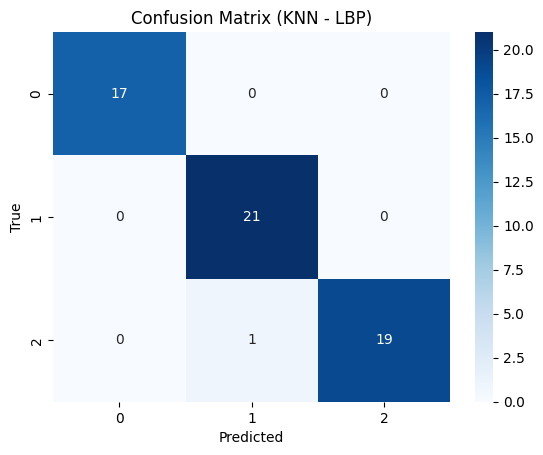

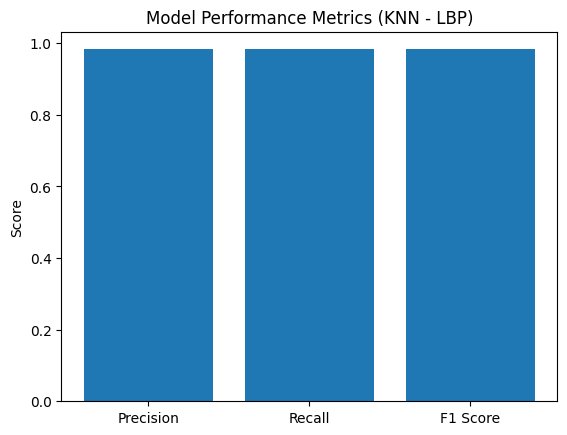

In [20]:
getFigures(confusion_matrices[0], "KNN", precisions[0], recalls[0], f1s[0])

In [21]:
models_lbp3 ,confusion_matrices,precisions,recalls,f1s = train_model(final_lbp_flattened, targets_lbp, 0.2,classifiers3)

############## Training rnd ##############
rnd accuracy: 96.55172413793103 %
[[16  1  0]
 [ 1 20  0]
 [ 0  0 20]]


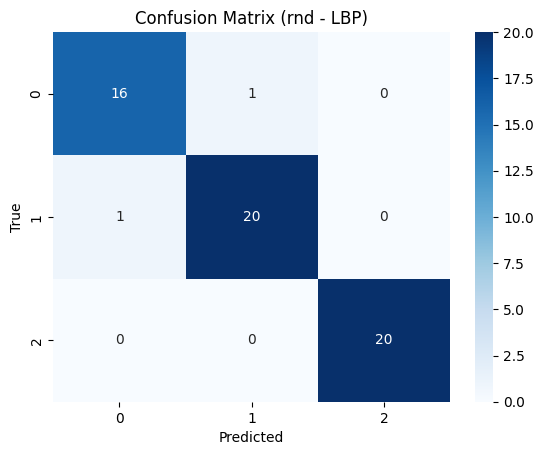

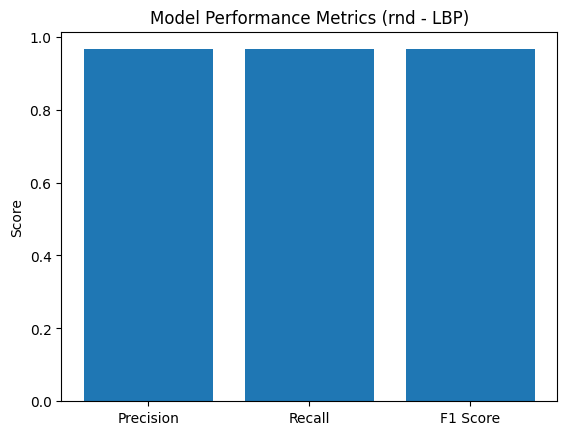

In [22]:
getFigures(confusion_matrices[0], "rnd", precisions[0], recalls[0], f1s[0])

In [14]:
models_lbp4 ,confusion_matrices,precisions,recalls,f1s = train_model(final_lbp_flattened, targets_lbp, 0.2,classifiers4)

############## Training voting_clf_soft ##############
voting_clf_soft accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]


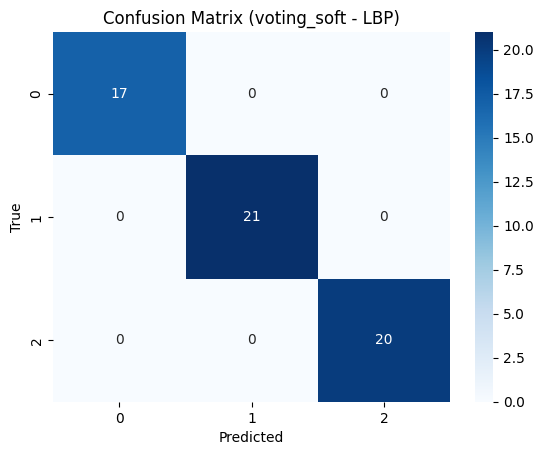

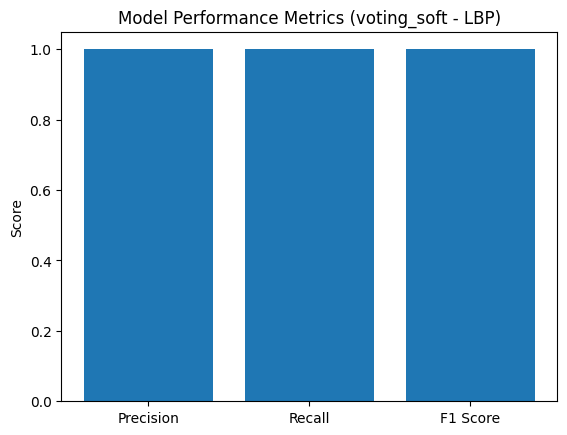

In [15]:
getFigures(confusion_matrices[0], "voting_soft", precisions[0], recalls[0], f1s[0])

In [16]:
models_lbp5 ,confusion_matrices,precisions,recalls,f1s = train_model(final_lbp_flattened, targets_lbp, 0.2,classifiers5)

############## Training voting_clf_hard ##############
voting_clf_hard accuracy: 98.27586206896551 %
[[17  0  0]
 [ 1 20  0]
 [ 0  0 20]]


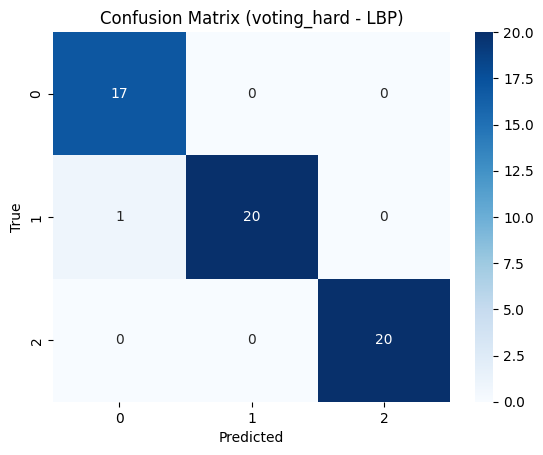

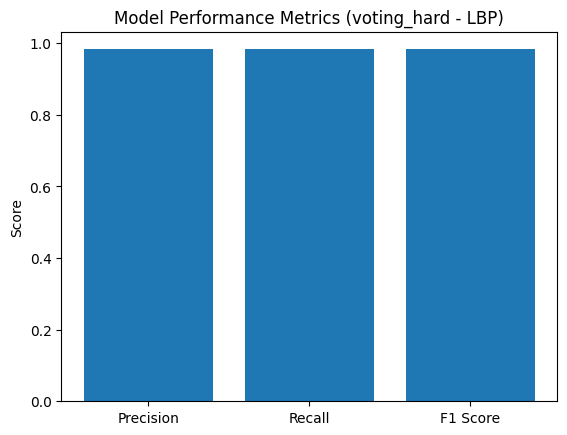

In [17]:
getFigures(confusion_matrices[0], "voting_hard",
           precisions[0], recalls[0], f1s[0])

In [22]:
import pickle

def save_models(modelsArray,suffix):
    for model in modelsArray:
        pickle.dump(next(iter(model.values())), open(
            f"./models/{next(iter(model.keys()))}_{suffix}.pkl", "wb"))

In [23]:
save_models(models_lbp,"lbp")

In [24]:
save_models(models_lbp2,"lbp")


In [25]:
save_models(models_lbp3,"lbp")


In [26]:
save_models(models_lbp4,"lbp")


In [27]:
save_models(models_lbp5,"lbp")
